### Problem Statement :
There is a multiclass problem in which you need to Predict the wine quality(0-10)

#### Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
import graphviz

#### Loading the Data Set

In [3]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


To predict quality of wine according to features

#### Checking shape of data

In [4]:
df.shape

(1599, 12)

#### checking missing values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Statstical Summary

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking class imbalance

In [4]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- From above output it is showing that quality is target variable which is multiclass as it has 6 classes as follows :

    Class Categories
    - 5
    - 6
    - 7
    - 4
    - 8
    - 3

- Class Imbalance

#### Resampling Techniques
    1. Undersampling : we will remove some majority class records, bring it equivalent to minority class
        - Disadvantage : Rarely used bcz of data loss.
    2. Oversampling : we will bring minority equivalent to majority by repeated sample of minority(upsampling).
        - Disadvantage : Overfitting situation bcz of repeated samples.
    3. SMOTE : synthetic minority oversampling Technique.
        - Increase synthetic/artificial sample(new sample)
        - k nearest neighbour- to choose nearest neighbour of minority, an artificial sample will be created in between the original value and the corresponding neighbour.

#### Handle imbalance problem using oversampling technique name SMOTE install imblearn

In [6]:
#pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


#### Seggregate X and Y

In [7]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

#### Oversampling

In [11]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,Y)

In [12]:
x_smote

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,9.149196,0.398463,0.500922,1.824598,0.070969,6.938505,16.000000,0.994699,3.208155,0.688770,12.453879
4082,10.487795,0.334085,0.487559,4.615944,0.071592,5.000000,14.408466,0.997412,3.192441,0.740187,11.848818
4083,9.493927,0.367416,0.421550,4.218861,0.070629,5.474161,12.525839,0.996443,3.286899,0.758359,12.173255
4084,8.783417,0.398653,0.469568,2.676683,0.078356,6.822111,17.000000,0.994735,3.170553,0.837789,12.275478


In [13]:
y_smote

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [14]:
from collections import Counter
Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

- Class Balanced

#### Checking shape of data after over sampling

In [15]:
print(x_smote.shape)
print(y_smote.shape)

(4086, 11)
(4086,)


#### Now dividing this SMOTE data (over sampled data) into training and test data.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.25,random_state=42)

#### Getting shape of train and test Data

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3064, 11)
(3064,)
(1022, 11)
(1022,)


In [19]:
clf=DecisionTreeClassifier() ## Taking default parameter values max_depth=5 and  
clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### Prediction

In [21]:
y_pred=clf.predict(x_test)
y_pred

array([3, 5, 7, ..., 4, 6, 4], dtype=int64)

#### Accuracy on Test

In [22]:
acc=accuracy_score(y_test,y_pred)
acc

0.7778864970645792

#### Confusion Matrix

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[164,   0,   0,   1,   0,   0],
       [  1, 132,  20,   9,   3,   0],
       [  4,  22, 122,  29,   8,   0],
       [  4,  16,  44,  94,  31,   4],
       [  0,   2,   2,  15, 121,   7],
       [  0,   0,   0,   2,   3, 162]], dtype=int64)

#### F1 Score

In [ ]:
f1=f1_score(y_test,y_pred,average="weighted")
f1

#### Accuracy on training

In [25]:
y_pred_train=clf.predict(x_train)

In [26]:
accuracy_score(y_train,y_pred_train)

1.0

- Overfitting

#### Tree visualization

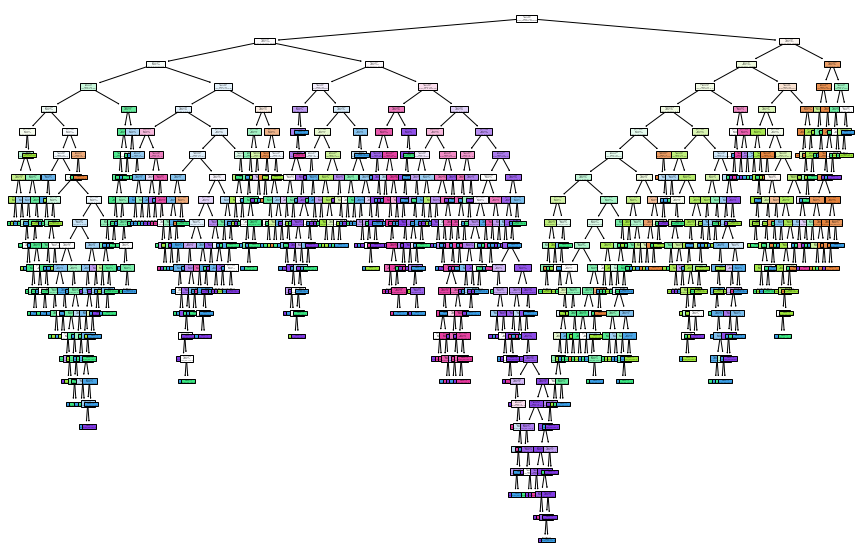

In [27]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()
fig.savefig("wine_tree.png")

####  hyperparameter Tuning

#### Seeing combination of hyperparameters by grid_search

In [28]:
## we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [29]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1) 

In [30]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [31]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [36]:
grid_search.best_score_  ## accuracy on training

0.7738236893452324

In [32]:
treemodel = DecisionTreeClassifier(criterion ='entropy', max_depth=22, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')                           

In [33]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22, splitter='random')

In [34]:
y_pred=treemodel.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.7465753424657534